In [234]:
import matplotlib.pyplot as plt
import numpy as np
%pylab inline

def meannorm(Y):
    return Y / mean(Y)

def packarray(A, rat):
    As = [A[row::rat] for row in range(rat)]
    #print As
    nowlen =  min([len(X) for X in As])
    B = As[0][:nowlen]
    
    for row in range(1,len(As)):
        B = B + As[row][:nowlen]
    return B
def packarray2d(A, rat):
    As = [A[:,row::rat] for row in range(rat)]
    #print As
    nowlen =  min([len(X[0]) for X in As])
    B = As[0][:,:nowlen]
    
    for row in range(1,len(As)):
        B = B + As[row][:,:nowlen]
    return B

execfile('/home/xiaodongli/software/pythonlib/stdA.py')
execfile('/home/xiaodongli/software/pythonlib/bossdatamock.py')
execfile('/home/xiaodongli/software/pythonlib/Tpcftools_smuximu.py')

#redshfitdata = np.loadtxt('../BigMD_2pcfs/')

Populating the interactive namespace from numpy and matplotlib


/usr/share/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
mapping_smudata_to_another_cosmology(smutabstd, DAstd, DAnew, Hstd, Hnew, deltamu=1.0/120.0, simple_replacement=False, max_mubin=120,
 smin_mapping=1,smax_mapping=51):


In [229]:
A, B, C = np.ones((3,3)), 2* np.ones((3,3)), 3* np.ones((3,3))

In [230]:
print A,B,C

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] [[2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]] [[3. 3. 3.]
 [3. 3. 3.]
 [3. 3. 3.]]


In [233]:
np.column_stack([A,B ,C])

array([[1., 1., 1., 2., 2., 2., 3., 3., 3.],
       [1., 1., 1., 2., 2., 2., 3., 3., 3.],
       [1., 1., 1., 2., 2., 2., 3., 3., 3.]])

In [235]:
def calc_intximu(filename, s_min = 6, s_max = 40, mumax = 0.97, 
                numsbin=150, nummubin=120, mubin_pack_rat = None, 
                omstd=0.3071, wstd=-1.0, omnew=0.3071, wnew = -1.0, z= 0.0):
    data = np.loadtxt(filename)
    norms = [float(xx) for xx in open(filename, 'r').readline().split()[1:4]]
    DD, DR, RR = [data[:,row].reshape(150,120) for row in [3,4,6]]
    DD /= norms[0]; DR /= norms[1]; RR /= norms[2]
    
    if omstd == omnew and wstd == wnew:
        pass
    else:
        DAstd, DAnew = DA(omstd, wstd, 0.6777, z), DA(omnew, wnew, 0.6777, z)
        Hstd, Hnew = Hz(omstd, wstd, 0.6777, z), Hz(omnew, wnew, 0.6777, z)
        DD2, DR2, RR2  = [ mapping_smudata_to_another_cosmology_simple(X, DAstd, DAnew, Hstd, Hnew, ) for X in [DD,DR,RR]]
        DD, DR, RR = DD2, DR2, RR2
    
    imumax = int(nummubin*mumax)
    DD, DR, RR = DD[:,:imumax], DR[:,:imumax], RR[:,:imumax]
    if mubin_pack_rat == None:
        pass
    else:
        DD, DR, RR = packarray2d(DD, mubin_pack_rat), packarray2d(DR, mubin_pack_rat), packarray2d(RR, mubin_pack_rat)
    xi = np.divide(DD-2*DR+RR,RR)
    return xi[s_min:s_max+1,:].sum(0)

In [288]:
def drawximu(nowid=None, filename=None, fig=None, ax1=None, ax2=None, ax3=None, ax4=None,\
             ax5=None, ax6=None, mubin_pack_rat = 1, mumax=0.97, color=None,
            omstd=0.3071, wstd=-1.0, omnew=0.3071, wnew = -1.0, z=0.0, zsma=0.0,
            only_plot_nbody=False):
    
    numsbin=150; nummubin=120;
    
    s_min=6; s_max=40
    
    c = '%s'%chr(color)
    
    if fig == None:
        fig, [[ax1, ax3, ax5], [ax2, ax4, ax6]] = plt.subplots(2, 3, figsize=(24,12))
        #fig.subplots_adjust(hspace=0)
       
    if filename == None:
        filename_cita = '/home/xiaodongli/projects/cf_pks/CITAData/rockstar_halos/rockstar_halos_'+\
        'gadget_0%02i'%nowid+'.nbar-1e-3.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf'
        
        filename_cola = '/home/xiaodongli/projects/cf_pks/cola_2pcfs/cola_output_cita/cola_cita_rock'+\
        'star_halos_%s'%chr(97+nowid)+'.nbar-1e-3.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf'
        
        filename_cita_sma = '/home/xiaodongli/projects/cf_pks/CITAData/rockstar_halos/rockstar_halos_'+\
        'gadget_0%02i'%(nowid+1)+'.nbar-1e-3.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf'
        
        filename_cola_sma = '/home/xiaodongli/projects/cf_pks/cola_2pcfs/cola_output_cita/cola_cita_rock'+\
        'star_halos_%s'%chr(97+nowid+1)+'.nbar-1e-3.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf'
    
    filename_cita_14 = '/home/xiaodongli/projects/cf_pks/CITAData/rockstar_halos/rockstar_halos_'+\
        'gadget_014.nbar-1e-3.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf'
    filename_cola_14 = '/home/xiaodongli/projects/cf_pks/cola_2pcfs/cola_output_cita/cola_cita_rock'+\
        'star_halos_o.nbar-1e-3.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf'

    filenames = [filename_cita, filename_cita_sma, filename_cola, filename_cola_sma, filename_cita_14, filename_cola_14]

#    intximu_cita, intximu_cita_sma, intximu_cola, intximu_cola_sma, intximu_cita_14, intximu_cola_14 = \
    zs = [z,zsma, z, zsma, 0.1, 0.1]
    #print zs
    intximus = [calc_intximu(filenames[row], s_min = s_min, s_max = s_max, mumax = mumax, mubin_pack_rat=mubin_pack_rat,
                            omstd=omstd, wstd=wstd, omnew=omnew, wnew = wnew, z=zs[row])
                    for row in range(len(filenames))]
    
    imumax = int(nummubin*mumax)
    Y_cita, Y_cita_sma, Y_cola, Y_cola_sma, Y_cita_14, Y_cola_14 = [meannorm(intximu) for intximu in intximus]
    mu = np.loadtxt(filenames[0])[:,0]; X = np.ones(nummubin) - mu[:nummubin]; X = X[:imumax]; 
    X = np.divide(packarray(X, mubin_pack_rat), float(mubin_pack_rat))

    
    error=list(map(lambda x: x[0]-x[1], zip(Y_cola,Y_cita)))
    #cita_dxidz = list(array(list(map(lambda x: x[0]-x[1], zip(Y_cita,Y_cita_sma))))/0.1)
    #cola_dxidz = list(array(list(map(lambda x: x[0]-x[1], zip(Y_cola,Y_cola_sma))))/0.1)
    cita_dxidz = array(list(map(lambda x: x[0]-x[1], zip(Y_cita,Y_cita_sma))))/0.1
    cola_dxidz = array(list(map(lambda x: x[0]-x[1], zip(Y_cola,Y_cola_sma))))/0.1
    
    # X, Y for plot
    ax1.plot(X,Y_cita, color = c,label='cita'+' z= '+str((15-nowid)*0.1))
    ax1.plot(X,Y_cola, color = c,linestyle=':',label='cola'+' z= '+str((15-nowid)*0.1))
    #ax1.plot(X,intximu_cita[:imumax], label='cita'+' z= '+str((15-nowid)*0.1))
    #ax1.plot(X,intximu_cola[:imumax], linestyle='dashed',label='cola'+' z= '+str((15-nowid)*0.1))
    ax1.set_ylabel(r'$\hat \xi_{\Delta s}(\mu)$', fontsize=20)
        

    label_err='cola-cita'+' z= '+str((15-nowid)*0.1)
    nowfit = polyfit(X,error,1)
    Y = polyval(nowfit,X)
    ax2.plot(X,error, color = c, label = label_err)
    ax2.plot(X,Y, ls='--', color = c,label = '1or cola-cita'+' z= '+str((15-nowid)*0.1))
    ax2.set_ylabel(r'$\hat \xi_{\Delta s}(\mu)$(cola-cita)',fontsize=20)
        
    
    label_z='z= '+str((15-nowid)*0.1)+'- z = 0.1'
    ax3.plot(X, Y_cita-Y_cita_14, color = c, label = 'cita ' +label_z)
    ax3.plot(X, Y_cola-Y_cola_14, color = c, ls=':', label = 'cola ' + label_z)
    ax3.set_ylabel(r'$\hat \xi_{\Delta s}(\mu) - \hat \xi_{\Delta s}(\mu, z=0.1)$', fontsize=20)
        
 
    label_h='z= '+str((15-nowid)*0.1)+'- z = 0.1'
    ax4.plot(X,(Y_cola-Y_cola_14)-(Y_cita-Y_cita_14), color = c, label = label_h)
    ax4.set_ylabel(r'$\xi_{\Delta s}(\mu,z)$(cola-cita)', fontsize=20)
        

    label_ci=' z = '+str((15-nowid)*0.1)+'-'+'z = '+str((14-nowid)*0.1)
    ax5.plot(X,cita_dxidz, color = c, label = 'cita '+label_ci)
    ax5.plot(X,cola_dxidz, color = c, ls=':',label = 'cola '+ label_ci)
    ax5.set_ylabel(r'$d\xi_{\Delta s}(\mu)/dz$',fontsize=20)
        
    ax6.plot(X,cola_dxidz-cita_dxidz, color = c, label = 'cola-cita '+ label_ci)
    #ax6.plot(X,np.array(cola_dxidz)-np.array(cita_dxidz))
    ax6.set_ylabel(r'$d\xi_{\Delta s}(\mu)/dz$(cola-cita)',fontsize=20)
   
    
    for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
        ax.grid(ls='--') 
        ax.set_xlabel('$1-\mu$', fontsize=18) 
        ax.legend(fontsize=14, frameon=False)
    return fig, ax1, ax2, ax3, ax4, ax5, ax6, z

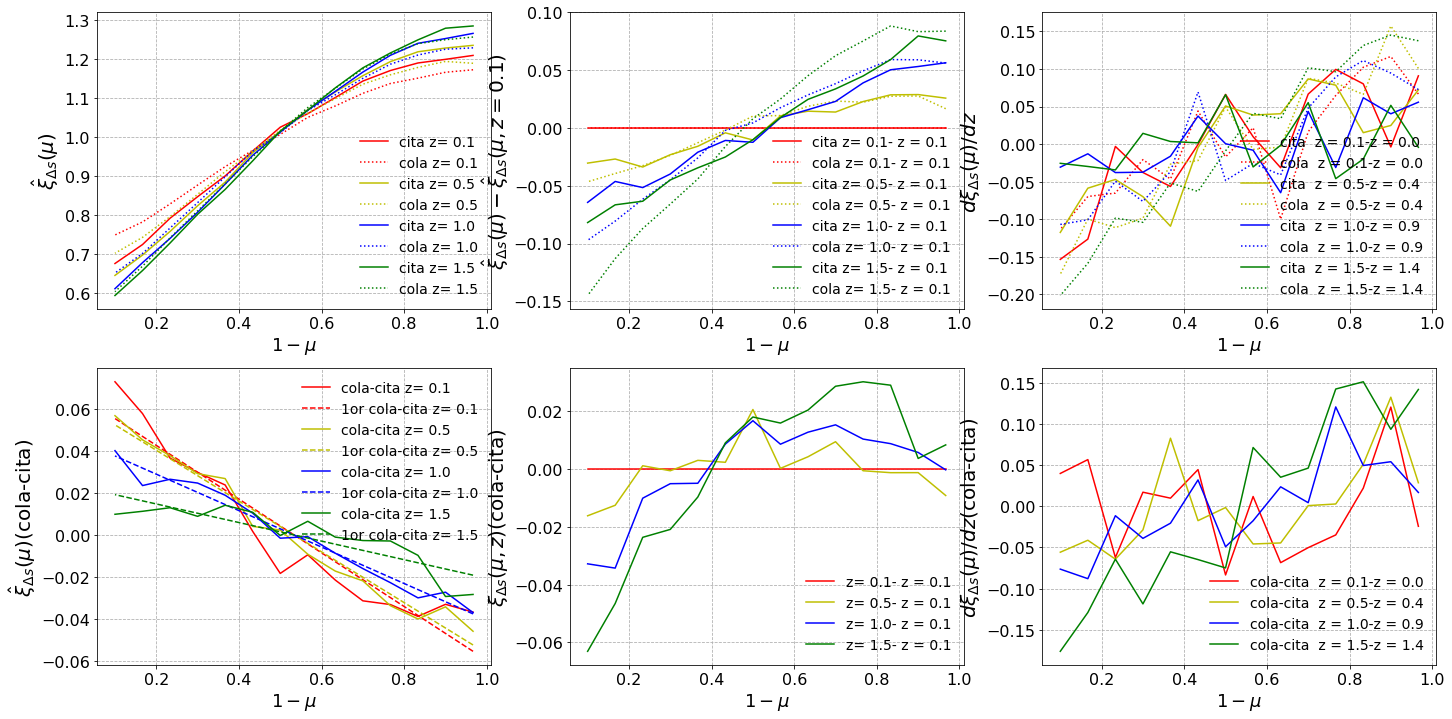

In [286]:
filename =fig = ax1 = ax2 = ax3 = ax4 = ax5 = ax6 = None
for nowid,color in [[14,114],[10,121],[5,98],[0,103]]:
#for nowid in [14,10,5,0]:
    fig, ax1, ax2, ax3, ax4, ax5, ax6, zsma=drawximu(nowid, filename, fig, ax1, ax2, ax3, ax4, ax5, ax6,
                                               mubin_pack_rat=8, mumax=0.99,color=color)
    #drawximu(nowid, filename, fig, ax1, ax2, ax3, ax4, ax5, ax6)
#fig.savefig('ximu.pdf', format='pdf')    

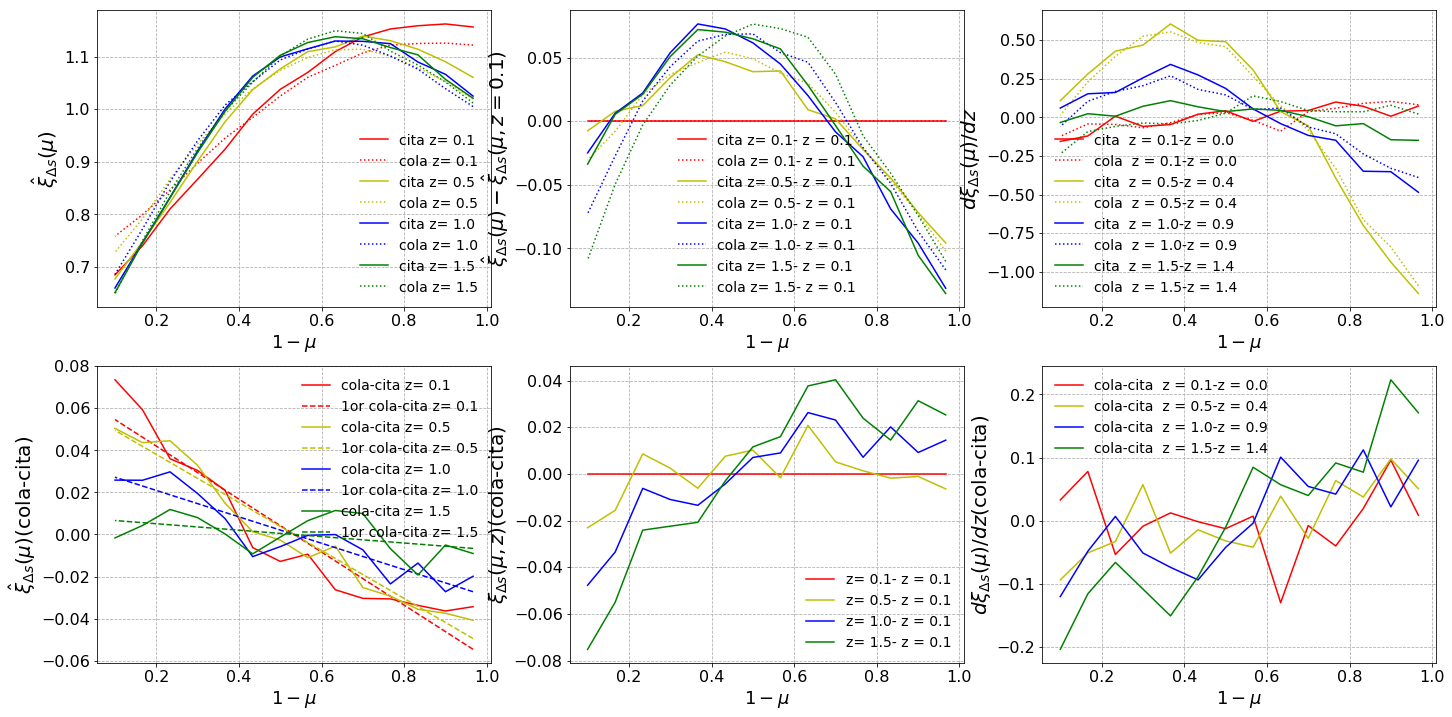

In [289]:
filename =fig = ax1 = ax2 = ax3 = ax4 = ax5 = ax6 = None
zsma = 0.1
for nowid,color,z in [[14,114,0.1],[10,121,0.5],[5,98,1.0],[0,103,1.5]]:
#for nowid in [14,10,5,0]:
    fig, ax1, ax2, ax3, ax4, ax5, ax6, zsma=drawximu(nowid, filename, fig, ax1, ax2, ax3, ax4, ax5, ax6,
                                               mubin_pack_rat=8, mumax=0.97,color=color,
                                                      omstd=0.3071, wstd=-1.0, omnew=1.0, wnew = -1, z=z,zsma=zsma)
                                              # omstd=0.3071, wstd=-1.0, omnew=0.3071, wnew = -2.5, z=z,zsma=zsma)
                                               #omstd=0.3071, wstd=-1.0, omnew=0.3070, wnew = -1.0, z=0.1)
                                              
    #drawximu(nowid, filename, fig, ax1, ax2, ax3, ax4, ax5, ax6)
#fig.savefig('ximu.pdf', format='pdf')    

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
[0.5, 0.1, 0.5, 0.1, 0.1, 0.1]
[1.0, 0.5, 1.0, 0.5, 0.1, 0.1]
[1.5, 1.0, 1.5, 1.0, 0.1, 0.1]


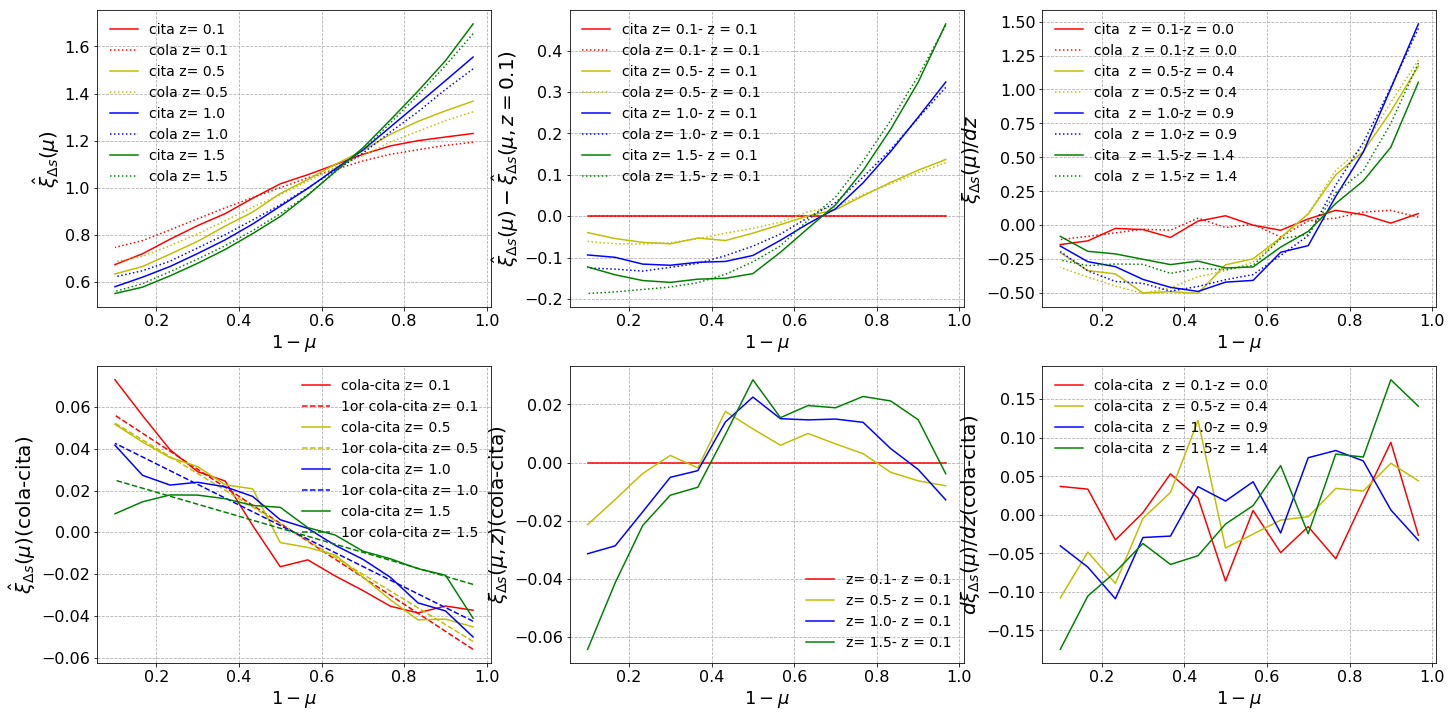

In [258]:
filename =fig = ax1 = ax2 = ax3 = ax4 = ax5 = ax6 = None
zsma = 0.1
for nowid,color,z in [[14,114,0.1],[10,121,0.5],[5,98,1.0],[0,103,1.5]]:
#for nowid in [14,10,5,0]:
    fig, ax1, ax2, ax3, ax4, ax5, ax6, zsma=drawximu(nowid, filename, fig, ax1, ax2, ax3, ax4, ax5, ax6,
                                               mubin_pack_rat=8, mumax=0.97,color=color,
                                                      omstd=0.3071, wstd=-1.0, omnew=0.05, wnew = -1, z=z,zsma=zsma)
                                              # omstd=0.3071, wstd=-1.0, omnew=0.3071, wnew = -2.5, z=z,zsma=zsma)
                                               #omstd=0.3071, wstd=-1.0, omnew=0.3070, wnew = -1.0, z=0.1)
                                              
    #drawximu(nowid, filename, fig, ax1, ax2, ax3, ax4, ax5, ax6)
#fig.savefig('ximu.pdf', format='pdf')    

In [150]:
for color in [114,121,98,103]:
    c='%s'%chr(color)
    print c

r
y
b
g


### Plot style:
    same color for same redshift


### Compare cola and Rockstar
    for cola: create a file using the average of many realizations


In [275]:
def drawdxi_dz(filename=None, fig=None, ax1=None, ax2=None, ax3=None,\
             s_min=None,s_max=None, mubin_pack_rat = 1, mumax=0.97, 
            omstd=0.3071, wstd=-1.0, omnew=0.3071, wnew = -1.0, only_plot_nbody=False):
    
    numsbin=150; nummubin=120
    
    if fig == None:
        fig, [ax1, ax2, ax3] = plt.subplots(nrows=1, ncols=3, figsize=(22,6))
       
    def meannorm(Y):
        return Y / mean(Y)
  

    for nowid, color in [[14,114],[10,121],[5,98],[0,103]]:
        if filename == None:
            filename_cita = '/home/xiaodongli/projects/cf_pks/CITAData/rockstar_halos/rockstar_halos_'+\
            'gadget_0%02i'%nowid+'.nbar-1e-3.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf'
        
            filename_cola = '/home/xiaodongli/projects/cf_pks/cola_2pcfs/cola_output_cita/cola_cita_rock'+\
            'star_halos_%s'%chr(97+nowid)+'.nbar-1e-3.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf'
        
            filename_cita_sma = '/home/xiaodongli/projects/cf_pks/CITAData/rockstar_halos/rockstar_halos_'+\
            'gadget_0%02i'%(nowid+1)+'.nbar-1e-3.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf'
        
            filename_cola_sma = '/home/xiaodongli/projects/cf_pks/cola_2pcfs/cola_output_cita/cola_cita_rock'+\
            'star_halos_%s'%chr(97+nowid+1)+'.nbar-1e-3.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf'
   
        filename_cita_14 = '/home/xiaodongli/projects/cf_pks/CITAData/rockstar_halos/rockstar_halos_'+\
        'gadget_014.nbar-1e-3.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf'
        filename_cola_14 = '/home/xiaodongli/projects/cf_pks/cola_2pcfs/cola_output_cita/cola_cita_rock'+\
        'star_halos_o.nbar-1e-3.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf'

        filenames = [filename_cita, filename_cita_sma, filename_cola, filename_cola_sma, filename_cita_14, filename_cola_14]

#    intximu_cita, intximu_cita_sma, intximu_cola, intximu_cola_sma, intximu_cita_14, intximu_cola_14 = \
        zs = [z,zsma, z, zsma, 0.1, 0.1]
        #print zs
        intximus = [calc_intximu(filenames[row], s_min = s_min, s_max = s_max, mumax = mumax, mubin_pack_rat=mubin_pack_rat,
                            omstd=omstd, wstd=wstd, omnew=omnew, wnew = wnew, z=zs[row])
                    for row in range(len(filenames))]
    
        imumax = int(nummubin*mumax)
        Y_cita, Y_cita_sma, Y_cola, Y_cola_sma, Y_cita_14, Y_cola_14 = [meannorm(intximu) for intximu in intximus]
        mu = np.loadtxt(filenames[0])[:,0]; X = np.ones(nummubin) - mu[:nummubin]; X = X[:imumax]; 
        X = np.divide(packarray(X, mubin_pack_rat), float(mubin_pack_rat))
        
    
        cita_dxidz = array(list(map(lambda x: x[0]-x[1], zip(Y_cita,Y_cita_sma))))/0.1
        cola_dxidz = array(list(map(lambda x: x[0]-x[1], zip(Y_cola,Y_cola_sma))))/0.1
        
        c = '%s'%chr(color)
        ax1.plot(X,Y_cita, color=c, label='cita'+' z= '+str((15-nowid)*0.1))
        ax1.plot(X,Y_cola,ls=':', color=c,  label='cola'+' z= '+str((15-nowid)*0.1))
        ax1.set_ylabel(r'$\hat \xi_{\Delta s}(\mu)$',fontsize=16)
        
        label_ci=' z = '+str((15-nowid)*0.1)+'-'+'z = '+str((14-nowid)*0.1)
        ax2.plot(X,cita_dxidz, color=c, label = 'cita '+label_ci)
        ax2.plot(X,cola_dxidz, color=c, ls=':',label = 'cola '+ label_ci)
        ax2.set_ylabel(r'd$\xi_{\Delta s}(\mu)/dz$',fontsize=20)
        
            
        ax3.plot(X,cola_dxidz-cita_dxidz, color=c, label = 'cola-cita '+ label_ci)
        #ax6.plot(X,np.array(cola_dxidz)-np.array(cita_dxidz))
        ax3.set_ylabel(r'$d\xi_{\Delta s}(\mu)/dz$(cola-cita)',fontsize=20)
            
        for ax in [ax1, ax2, ax3]:
            ax.grid(ls='--');
            ax.set_xlabel('$1-\mu$', fontsize=18) 
            ax.legend(fontsize=14, frameon=False)
        fig.suptitle('CITA rockstar halos'+' s = '+str(s_min)+'---'+str(s_max),fontsize=22)
    return fig, ax1, ax2, ax3

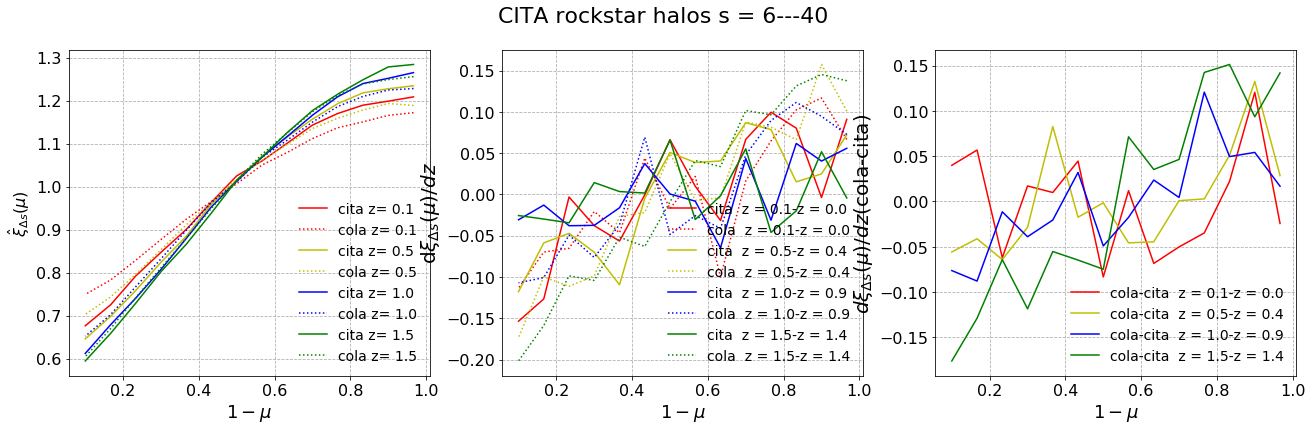

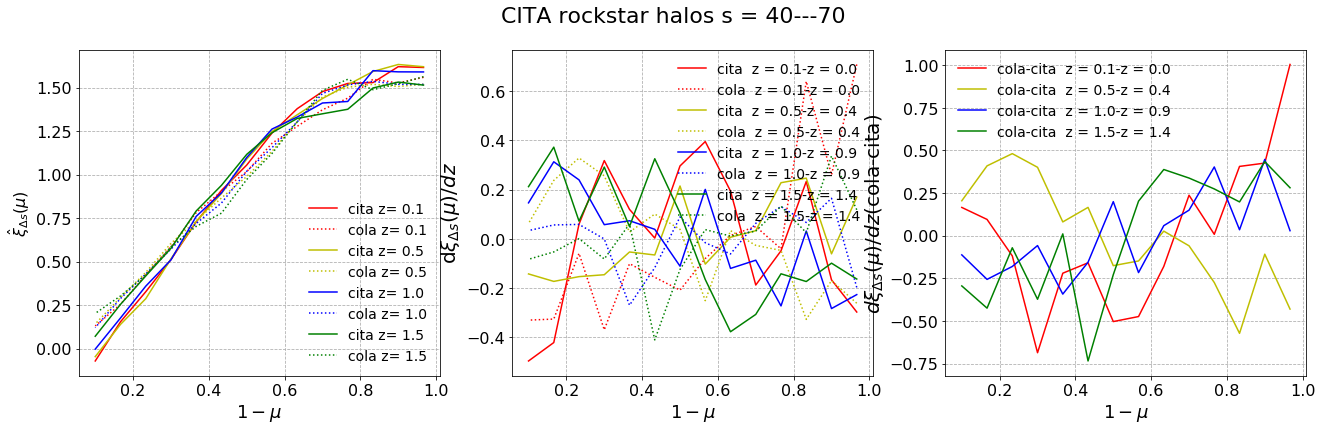

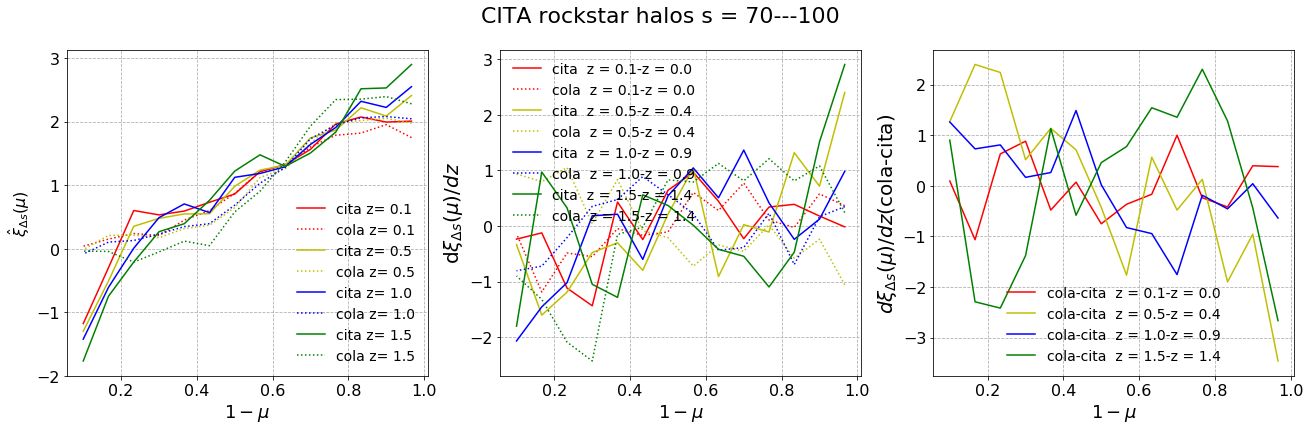

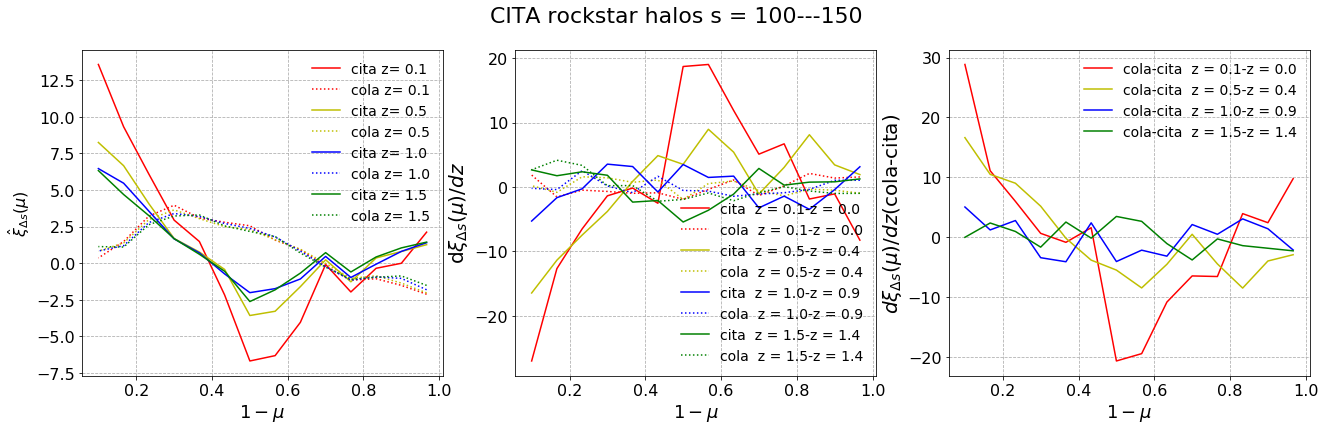

In [284]:
fig = ax1 = ax2 = ax3 =s_min=s_max= None
for smin, smax in [[6,40],[40,70],[70,100],[100,150]]:
         #fig, ax1, ax2, ax3 = 
    drawdxi_dz(fig=fig, ax1=ax1, ax2=ax2, ax3=ax3, s_min=smin, s_max=smax, mubin_pack_rat = 8, 
               mumax=0.97,omstd=0.3071, wstd=-1.0, omnew=0.3071, wnew = -1.0, only_plot_nbody=False)

In [10]:

def drawdxi_dz(fig=None, ax1=None,  ax2=None, s_min=None, s_max=None, mumax=1, mubin = None):
    
    numsbin=150; nummubin=120; mumax=1
    cita_dxidz = [0 for i in range(15)]
    cola_dxidz = [0 for i in range(15)]
    
    if fig == None:
        fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
       
    def meannorm(Y):
        return Y / mean(Y)
    
    for nowid in range(15):
#         if filename == None:
        filename_cita = '/home/xiaodongli/projects/cf_pks/CITAData/rockstar_halos/rockstar_halos_'+\
            'gadget_0%02i'%nowid+'.nbar-1e-3.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf'
        
        filename_cola = '/home/xiaodongli/projects/cf_pks/cola_2pcfs/cola_output_cita/cola_cita_rock'+\
            'star_halos_%s'%chr(97+nowid)+'.nbar-1e-3.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf'
        
        filename_cita_sma = '/home/xiaodongli/projects/cf_pks/CITAData/rockstar_halos/rockstar_halos_'+\
            'gadget_0%02i'%(nowid+1)+'.nbar-1e-3.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf'
        
        filename_cola_sma = '/home/xiaodongli/projects/cf_pks/cola_2pcfs/cola_output_cita/cola_cita_rock'+\
            'star_halos_%s'%chr(97+nowid+1)+'.nbar-1e-3.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf'
        #nowid<=14
        
        data_cita = np.loadtxt(filename_cita); 
        norms_cita = [float(xx) for xx in open(filename_cita, 'r').readline().split()[1:4]];
        data_cola = np.loadtxt(filename_cola); 
        norms_cola = [float(xx) for xx in open(filename_cola, 'r').readline().split()[1:4]];
        data_cita_sma = np.loadtxt(filename_cita_sma); 
        norms_cita_sma = [float(xx) for xx in open(filename_cita_sma, 'r').readline().split()[1:4]];
        data_cola_sma = np.loadtxt(filename_cola_sma); 
        norms_cola_sma = [float(xx) for xx in open(filename_cola_sma, 'r').readline().split()[1:4]];
    
        DD_cita, DR_cita, RR_cita = [data_cita[:,row].reshape(150,120) for row in [3,4,6]]; 
        DD_cita /= norms_cita[0]; DR_cita /= norms_cita[1]; RR_cita /= norms_cita[2]
        DD_cola, DR_cola, RR_cola = [data_cola[:,row].reshape(150,120) for row in [3,4,6]]; 
        DD_cola /= norms_cola[0]; DR_cola /= norms_cola[1]; RR_cola /= norms_cola[2]
        DD_cita_sma, DR_cita_sma, RR_cita_sma = [data_cita_sma[:,row].reshape(150,120) for row in [3,4,6]]; 
        DD_cita_sma /= norms_cita_sma[0]; DR_cita_sma /= norms_cita_sma[1]; RR_cita_sma /= norms_cita_sma[2]
        DD_cola_sma, DR_cola_sma, RR_cola_sma = [data_cola_sma[:,row].reshape(150,120) for row in [3,4,6]]; 
        DD_cola_sma /= norms_cola_sma[0]; DR_cola_sma /= norms_cola_sma[1]; RR_cola_sma /= norms_cola_sma[2]
    
         # xi, intximu
        xi_cita = np.divide(DD_cita-2*DR_cita+RR_cita,RR_cita)
        intximu_cita = xi_cita[s_min:s_max+1,:].sum(0)
        xi_cita_sma = np.divide(DD_cita_sma-2*DR_cita_sma+RR_cita_sma,RR_cita_sma)
        intximu_cita_sma = xi_cita_sma[s_min:s_max+1,:].sum(0)
        xi_cola = np.divide(DD_cola-2*DR_cola+RR_cola,RR_cola)
        intximu_cola = xi_cola[s_min:s_max+1,:].sum(0)
        xi_cola_sma = np.divide(DD_cola_sma-2*DR_cola_sma+RR_cola_sma,RR_cola_sma)
        intximu_cola_sma = xi_cola_sma[s_min:s_max+1,:].sum(0)
       
    
        imumax = int(nummubin*mumax)
        #intximu = intximu[:imumax]
        #mu = data_cita[:,0]; X = np.ones(nummubin) - mu[:nummubin]; X = X[:imumax]; 
        Y_cita = intximu_cita[:imumax]/intximu_cita[:imumax].sum()*len(intximu_cita[:imumax])
        Y_cita_sma = intximu_cita_sma[:imumax]/intximu_cita_sma[:imumax].sum()*len(intximu_cita_sma[:imumax])
        Y_cola = intximu_cola[:imumax]/intximu_cola[:imumax].sum()*len(intximu_cola[:imumax])
        Y_cola_sma = intximu_cola_sma[:imumax]/intximu_cola_sma[:imumax].sum()*len(intximu_cola_sma[:imumax])
    
        
        x=np.linspace(0.05,1.45,15)
        cita_dxidz[nowid] = (Y_cita[mubin]-Y_cita_sma[mubin])/0.1
        cola_dxidz[nowid] = (Y_cola[mubin]-Y_cola_sma[mubin])/0.1
        cola_cita = list(map(lambda x: x[0]-x[1], zip(cola_dxidz, cita_dxidz)))
        
    
    # X, Y for plot 
    for order in [2]:
        nowfit_cita = polyfit(x,cita_dxidz,order)
        Y_cita = polyval(nowfit_cita,x)
        nowfit_cola = polyfit(x,cola_dxidz,order)
        Y_cola = polyval(nowfit_cola,x)
        
    ax1.plot(x,cita_dxidz, label='cita')
    ax1.plot(x,Y_cita, label='cita, order = '+str(order))
    ax1.plot(x,cola_dxidz, ls=':', label='cola')
    ax1.plot(x,Y_cola, ls=':', label='cola, order = '+str(order))
    ax1.set_ylabel(r'$\hat \xi_{\Delta s}(\mu)$ '+'\ ${\Delta z}$',fontsize=16)
    
    ax2.plot(x,cola_cita, label='cola-cita')
    ax2.plot(x,Y_cola-Y_cita, label='cola-cita, order = '+str(order))
    ax2.set_ylabel(r'$\hat \xi_{\Delta s}(\mu)$ '+'\ ${\Delta z}$(cola-cita)',fontsize=16) 
    for ax in [ax1, ax2]:
            ax.grid(ls='--');
            ax.set_xlabel('$z$', fontsize=18) 
            ax.legend(fontsize=14, frameon=False)
    
    #fig.suptitle(r'$\hat \xi_{\Delta s}(\mu)$\${\Delta z}$',fontsize=22)
    return fig, ax1, ax2

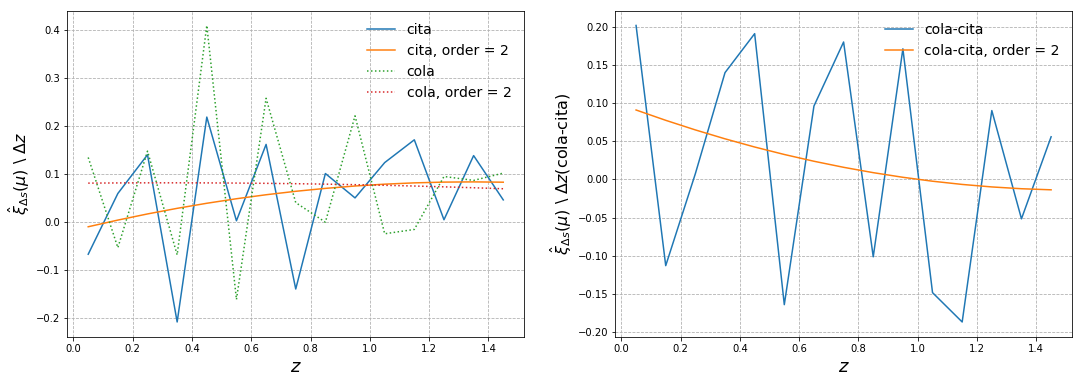

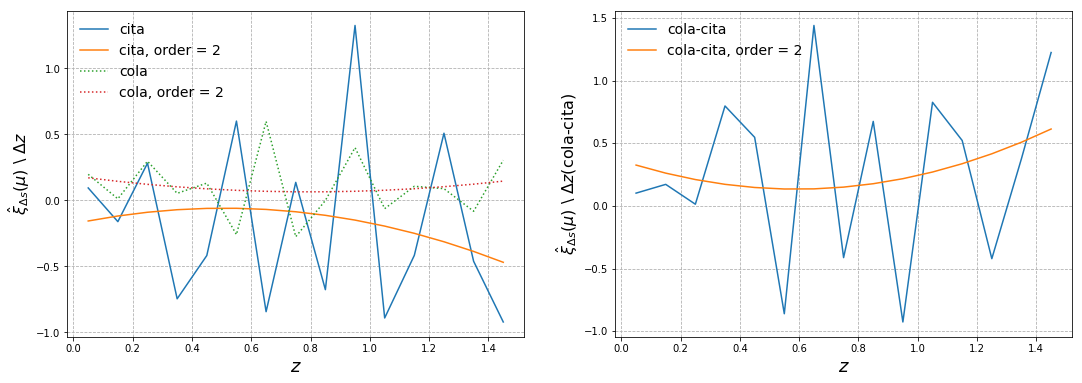

In [11]:
fig = ax1 = ax2 = None
for mubin in [6]:
    
    for s_min, s_max in [[6,40],[40,70]]:
        drawdxi_dz(fig, ax1, ax2, s_min, s_max, mubin)